In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, accuracy_score, mean_absolute_error, recall_score, precision_score, f1_score

In [33]:
import sklearn
print(sklearn.__version__)

1.6.1


In [34]:
df_simple = pd.read_csv('data_simple_reg.csv')
df_simple.info()
df_simple.dropna(inplace=True)
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         4572 non-null   int64  
 1   Quang_Cao  4562 non-null   float64
 2   Tiep_Thi   4568 non-null   float64
 3   Online     4566 non-null   float64
 4   Doanh_So   4566 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 178.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         4546 non-null   int64  
 1   Quang_Cao  4546 non-null   float64
 2   Tiep_Thi   4546 non-null   float64
 3   Online     4546 non-null   float64
 4   Doanh_So   4546 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 213.1 KB


In [35]:
x_qc = df_simple[['Quang_Cao']]
y_ds = df_simple['Doanh_So']
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_qc_train, x_qc_test, y_ds_train, y_ds_test = train_test_split(x_qc, y_ds, test_size=0.2, random_state=42)

In [36]:
print(x_qc_train.shape, x_qc_test.shape, y_ds_train.shape, y_ds_test.shape)

(3636, 1) (910, 1) (3636,) (910,)


In [37]:
# tạo mô hình hồi quy tuyến tính
simple_model = LinearRegression()
# huấn luyện mô hình
simple_model.fit(x_qc_train, y_ds_train)
# Y = b*x + a
# b là hệ số góc, a là hệ số chặn
b = simple_model.coef_[0]
a = simple_model.intercept_
y_ds_pred = simple_model.predict(x_qc_test)
print(f'Hệ số góc b: {b:.4f}, Hệ số chặn a: {a:.4f}')
print(f'Phương trình hồi quy: Doanh_So = {b:.4f} * Quang_Cao + {a:.4f}')

Hệ số góc b: 3.5245, Hệ số chặn a: 42.6761
Phương trình hồi quy: Doanh_So = 3.5245 * Quang_Cao + 42.6761


In [38]:
print('So sánh 10 giá trị dự đoán và thực tế:')
comparison_df = pd.DataFrame({'Dự đoán': y_ds_pred[:10], 'Thực tế': y_ds_test[:10]})
print(comparison_df)

So sánh 10 giá trị dự đoán và thực tế:
         Dự đoán     Thực tế
497    74.396787   80.261284
3800   84.970345   92.574904
24    303.490541  297.250108
1918  229.475636  220.102176
142   289.392464  298.960377
1815   60.298710   64.992087
3357  166.034289  172.150178
2398  240.049194  254.141912
2345  257.671790  247.696768
3282  352.833811  347.466797


In [39]:
print(y_ds_pred.shape, y_ds_test.shape)

(910,) (910,)


In [40]:
r2_simple = r2_score(y_ds_test, y_ds_pred)
mse_simple = mean_squared_error(y_ds_test, y_ds_pred)
mae_simple = mean_absolute_error(y_ds_test, y_ds_pred)

print(f'R2: {r2_simple:.4f}, MSE: {mse_simple:.4f}, MAE: {mae_simple:.4f}')

R2: 0.9874, MSE: 106.3692, MAE: 8.8416


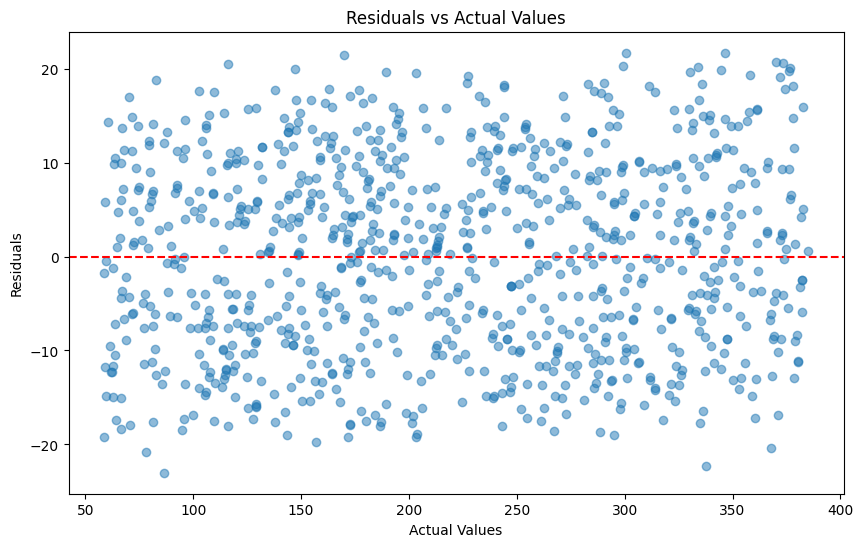

In [47]:
residuals_simple = y_ds_test - y_ds_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_ds_test, residuals_simple, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [41]:
df_multi = pd.read_csv('data_multiple_reg.csv')
df_multi.info()
df_multi.dropna(inplace=True)
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         572 non-null    int64  
 1   Quang_Cao  572 non-null    object 
 2   PR         572 non-null    float64
 3   Online     572 non-null    float64
 4   KOL        572 non-null    object 
 5   Doanh_So   572 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 26.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TT         572 non-null    int64  
 1   Quang_Cao  572 non-null    object 
 2   PR         572 non-null    float64
 3   Online     572 non-null    float64
 4   KOL        572 non-null    object 
 5   Doanh_So   572 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 26.9+ KB


In [42]:
print(df_multi['Quang_Cao'].unique())

['Low' 'High' 'Medium-High' 'Medium-Low']


In [43]:
quang_cao_encoded = pd.get_dummies(df_multi['Quang_Cao'], prefix='Quang_Cao', drop_first=True)
df_multi = pd.concat([df_multi, quang_cao_encoded], axis=1)
print(df_multi.head())
# xác định biến phụ thuộc và biến độc lập
y_multi = df_multi['Doanh_So']
x_multi = df_multi.drop(columns=['Doanh_So', 'Quang_Cao', 'KOL', 'TT'])
print(x_multi.shape, y_multi.shape)
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

# huấn luyện mô hình hồi quy tuyến tính
multi_model = LinearRegression()
multi_model.fit(x_multi_train, y_multi_train)
# y = b0 + b1*x1 + b2*x2 + ... + bn*xn
b0 = multi_model.intercept_
b = multi_model.coef_
print(f'Hệ số chặn b0: {b0:.4f}')
print('Hệ số góc b:', [f'{bi:.4f}' for bi in b])

   TT    Quang_Cao         PR    Online    KOL    Doanh_So  Quang_Cao_Low  \
0   0          Low   1.034766  4.297423  Micro   80.261284           True   
1   1          Low   5.340160  0.744989   Mega   92.574904           True   
2   2         High  21.918056  0.004401  Micro  297.250108          False   
3   3  Medium-High  20.288928  0.688838   Mega  220.102176          False   
4   4         High  30.048338  7.365014   Nano  298.960377          False   

   Quang_Cao_Medium-High  Quang_Cao_Medium-Low  
0                  False                 False  
1                  False                 False  
2                  False                 False  
3                   True                 False  
4                  False                 False  
(572, 5) (572,)
Hệ số chặn b0: 260.2023
Hệ số góc b: ['2.2021', '0.6767', '-163.2423', '-55.8264', '-103.6154']


In [44]:
y_multi_pred = multi_model.predict(x_multi_test)
print('10 giá trị dự đoán và thực tế:')
print(pd.DataFrame({'Dự đoán': y_multi_pred[:10], 'Thực tế': y_multi_test[:10]}))

10 giá trị dự đoán và thực tế:
        Dự đoán     Thực tế
512  126.860167  163.431595
70   193.757719  176.755395
131  304.458799  308.251107
404  118.013362   89.560535
543  321.462474  360.604322
320  120.450849  126.873101
188  238.982469  222.225133
29   194.860640  185.170014
81   300.838006  306.592890
309  317.897169  349.047710


In [45]:
r2_multi = r2_score(y_multi_test, y_multi_pred)
mse_multi = mean_squared_error(y_multi_test, y_multi_pred)
mae_multi = mean_absolute_error(y_multi_test, y_multi_pred)
print(f'R2: {r2_multi:.4f}')
print(f'MSE: {mse_multi:.4f}')
print(f'MAE: {mae_multi:.4f}')

R2: 0.9201
MSE: 625.7173
MAE: 20.7051


In [46]:
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

# đọc dữ liệu từ file CSV
df_logistic = pd.read_csv('data_logistic_reg.csv')
df_logistic.dropna(inplace=True)

# mã hóa cột 'Danh_Gia' thành số 1 và 0
le = LabelEncoder()
df_logistic['Danh_Gia'] = le.fit_transform(df_logistic['Danh_Gia'])
print(df_logistic['Danh_Gia'].unique())

# xác định biến phụ thuộc và biến độc lập
x_log = df_logistic[['Chat_Luong_Tai_Xe', 'Thoi_Gian_vs_Du_Kien']]
y_log = df_logistic['Danh_Gia']
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log, y_log, test_size=0.1, random_state=42)
# huấn luyện mô hình hồi quy logistic
logistic_model = LogisticRegression()
logistic_model.fit(x_log_train, y_log_train)

# dự đoán trên tập kiểm tra
y_log_pred = logistic_model.predict(x_log_test)
print('10 giá trị dự đoán và thực tế:')
print(pd.DataFrame({'Dự đoán': y_log_pred[:10], 'Thực tế': y_log_test[:10]}))

# Tính toán các chỉ số đánh giá mô hình
TP = np.sum((y_log_pred == 1) & (y_log_test == 1))
TN = np.sum((y_log_pred == 0) & (y_log_test == 0))
FP = np.sum((y_log_pred == 1) & (y_log_test == 0))
FN = np.sum((y_log_pred == 0) & (y_log_test == 1))
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')

accuracy = accuracy_score(y_log_test, y_log_pred)
precision = precision_score(y_log_test, y_log_pred)
recall = recall_score(y_log_test, y_log_pred)
f1 = f1_score(y_log_test, y_log_pred)
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

[1 0]
10 giá trị dự đoán và thực tế:
       Dự đoán  Thực tế
98180        1        1
24974        0        0
69242        0        0
90488        1        1
36205        1        0
25152        0        0
24468        1        1
47390        0        0
93652        0        1
88663        1        1
TP: 5776, TN: 4610, FP: 1312, FN: 1251
Accuracy: 0.8021, Precision: 0.8149, Recall: 0.8220, F1: 0.8184
